In [9]:
import AlexEigScattering as AES
import os,time, h5py
import numpy as np
import matplotlib.pyplot as plt
from common.baseclasses import ArrayWithAxes as AWA

basedir=os.path.dirname("./")


In [10]:
def load_eigpairs(eigpair_fname):
    """Are eigenvalues correct?? They seem to be for Laplace operator on mesh of 0-101 range.

    Normalization by sum always ensures that integration will be like summing, which is
    much simpler than keeping track of dx, dy..."""

    global eigpairs
    eigpairs = dict()

    path=os.path.join(basedir,eigpair_fname)

    with h5py.File(path,'r') as f:
        for key in list(f.keys()):
            eigfunc=np.array(f.get(key))
            eigfunc/=np.sqrt(np.sum(np.abs(eigfunc)**2))
            eigpairs[float(key)] = AWA(eigfunc,\
                                       axes=[np.linspace(-1,1,eigfunc.shape[0]),\
                                             np.linspace(-1,1,eigfunc.shape[1])])


In [13]:
def TestScatteringBasisChange(q=20,\
                           E=2000*np.exp(1j*2*np.pi*5e-2),\
                           N=100):

    global Responder,Jmaker

    Responder=AES.SampleResponse(eigpairs,E=E,N=N)
    xs,ys=Responder.xs,Responder.ys
    Jmaker=AES.BesselGenerator(q,xs=xs,ys=ys)

    last = 0
    for i,x0 in enumerate(xs):
        for j,y0 in enumerate(ys):
            print(i,j)
            start = time.time()
            tip_eigenbasis=Jmaker.GetTipEigenbasis(x0,y0)
            R_alphabeta = Responder.GetRAlphaBeta(tip_eigenbasis)
            Pz = np.diag(np.ones(R_alphabeta.shape[0]))
            Lambdaz_beta = np.ones(R_alphabeta.shape[0])
            Pz_alpha = np.linalg.inv(Pz-R_alphabeta).dot(Lambdaz_beta)
            print(Pz_alpha)
            last = AES.Progress(i,len(xs),last)
    plt.figure()
    plt.imshow([np.abs(Pz_alpha)])
    plt.show()



Setting Energy
Setting Sigma
Setting Kernel
Setting Scattering Matrix
Excitation vector (in basis of J(n), n in [0,10]):
	[3 4 1 4 2 0 2 4 4 1]
0 0
[0.9999998 -3.92074743e-07j 1.00000058+1.14140936e-06j
 1.00000034+6.61076202e-07j 0.99999477-1.02671435e-05j
 1.00000012+2.38549948e-07j 0.99999947-1.04163503e-06j
 0.9999941 -1.15767870e-05j 0.99999924-1.49269693e-06j
 0.9999962 -7.45712688e-06j 0.99999916-1.64886855e-06j]
0 1
[1.00000007+1.45468569e-07j 1.00000006+1.21455237e-07j
 0.99999949-9.98572639e-07j 0.99999522-9.37488582e-06j
 0.99999965-6.78520678e-07j 0.99999759-4.72384019e-06j
 0.99999464-1.05167324e-05j 1.00000061+1.20216394e-06j
 0.99999642-7.03535176e-06j 0.99999733-5.24369019e-06j]
0 2
[0.99999986-2.81039668e-07j 1.00000045+8.84242058e-07j
 0.99999956-8.72825920e-07j 0.9999975 -4.90643118e-06j
 0.99999849-2.97286258e-06j 0.99999767-4.57345004e-06j
 0.99999802-3.88637962e-06j 1.00000137+2.69840238e-06j
 0.99999614-7.57969855e-06j 0.99999895-2.05661707e-06j]
0 3
[1.00000002+

[1.00000012+2.31969079e-07j 1.00000017+3.36486576e-07j
 0.99999952-9.39749245e-07j 1.00000027+5.26064206e-07j
 0.99999695-5.98644887e-06j 0.9999983 -3.34684399e-06j
 0.99999326-1.32246235e-05j 1.0000011 +2.15560666e-06j
 0.99999732-5.26751415e-06j 1.0000015 +2.93720333e-06j]
2 8
[0.99999995-9.41094213e-08j 0.99999995-9.70620927e-08j
 1.00000017+3.30996949e-07j 0.99999946-1.05361086e-06j
 0.99999675-6.37847629e-06j 0.99999815-3.63579838e-06j
 0.99999721-5.47632594e-06j 0.99999918-1.60127235e-06j
 0.99999939-1.19644400e-06j 1.00000136+2.66238636e-06j]
2 9
[1.00000001+2.35782200e-08j 0.99999995-9.51570811e-08j
 0.99999966-6.63239049e-07j 0.99999898-2.00613798e-06j
 0.99999717-5.55889036e-06j 1.00000046+8.99898485e-07j
 0.99999778-4.37400961e-06j 0.99999884-2.27458566e-06j
 0.99999655-6.77626822e-06j 1.00000056+1.10994560e-06j]
2 10
[1.00000009+1.69656754e-07j 0.99999996-7.18947390e-08j
 1.00000022+4.34293879e-07j 0.99999967-6.48008659e-07j
 0.99999969-6.01760799e-07j 0.99999936-1.25006993

[0.99999985-2.88211901e-07j 0.99999977-4.57547416e-07j
 0.99999993-1.44705189e-07j 1.00000147+2.87913066e-06j
 0.99999614-7.59596618e-06j 0.99999391-1.19671857e-05j
 0.99999432-1.11555454e-05j 0.99999864-2.66994459e-06j
 0.99999939-1.19811094e-06j 1.00000151+2.97351826e-06j]
5 5
[0.99999993-1.37862554e-07j 0.99999984-3.14429728e-07j
 0.99999969-6.04205648e-07j 0.99999825-3.44248017e-06j
 1.00000015+2.87831017e-07j 0.99999453-1.07292842e-05j
 1.00000132+2.59355357e-06j 0.99999684-6.19500692e-06j
 1.00000457+8.97379220e-06j 0.9999999 -1.86548178e-07j]
5 6
[0.99999985-2.88211901e-07j 0.99999977-4.57547416e-07j
 0.99999993-1.44705189e-07j 1.00000147+2.87913066e-06j
 0.99999614-7.59596618e-06j 0.99999391-1.19671857e-05j
 0.99999432-1.11555454e-05j 0.99999864-2.66994459e-06j
 0.99999939-1.19811094e-06j 1.00000151+2.97351826e-06j]
5 7
[0.99999992-1.65885548e-07j 0.99999997-6.70902934e-08j
 1.00000001+1.88358173e-08j 1.00000009+1.83026613e-07j
 0.99999459-1.06281911e-05j 0.99999547-8.90194150e

[0.99999995-9.41094213e-08j 0.99999995-9.70620928e-08j
 1.00000017+3.30996949e-07j 0.99999946-1.05361086e-06j
 0.99999675-6.37847629e-06j 0.99999815-3.63579838e-06j
 0.99999721-5.47632594e-06j 0.99999918-1.60127235e-06j
 0.99999939-1.19644400e-06j 1.00000136+2.66238636e-06j]
8 3
[1.00000012+2.31969079e-07j 1.00000017+3.36486576e-07j
 0.99999952-9.39749245e-07j 1.00000027+5.26064206e-07j
 0.99999695-5.98644887e-06j 0.9999983 -3.34684399e-06j
 0.99999326-1.32246235e-05j 1.0000011 +2.15560666e-06j
 0.99999732-5.26751415e-06j 1.0000015 +2.93720333e-06j]
8 4
[0.99999993-1.37479346e-07j 0.99999984-3.09776647e-07j
 0.99999912-1.73514674e-06j 1.00000085+1.66087685e-06j
 0.99999665-6.57298684e-06j 0.99999878-2.38945779e-06j
 0.99999314-1.34722763e-05j 1.00000197+3.87149472e-06j
 0.99999727-5.35638471e-06j 1.00000129+2.54020490e-06j]
8 5
[1.00000002+4.46496236e-08j 1.00000003+6.72676838e-08j
 1.0000003 +5.93512062e-07j 1.00000081+1.59587544e-06j
 0.99999772-4.48910549e-06j 0.99999885-2.25446816e

TypeError: Invalid shape (10,) for image data

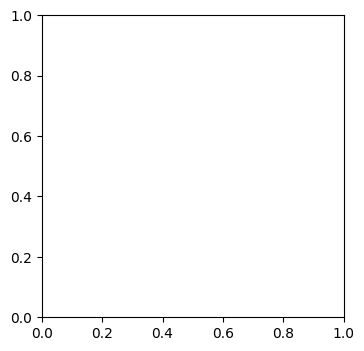

In [14]:
load_eigpairs("UnitSquareMesh_10x10_500_eigenbasis.h5")
TestScatteringBasisChange(N=10)